In [14]:
using CSV
using JSON
using DataFrames

In [13]:
import PlotlyJS

In [3]:
hospital_data = CSV.File("../../data/hospitals/hospital_locations.csv") |> DataFrame!;
population_data = CSV.read("../../data/general/census_population.csv", copycols=true);

In [4]:
filter!(row -> row.COUNTY > 0, population_data)
population_data.FIPS = map(row -> lpad(row.STATE, 2, "0") * lpad(row.COUNTY, 3, "0"), eachrow(population_data));

In [5]:
county_shapes = JSON.parsefile("../../data/geography/geojson-counties-fips.json");

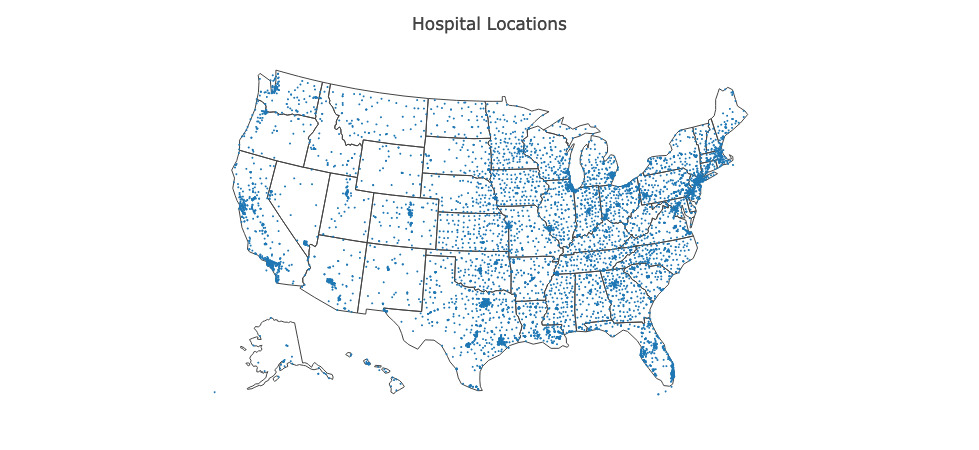

In [11]:
hospitalmap_trace = PlotlyJS.scattergeo(
    hospital_data,
    locationmode="USA-states",
    lat=:LATITUDE, lon=:LONGITUDE,
    marker_size=2.0,
)
hospitalmap_geo = PlotlyJS.attr(
    scope="usa",
    projection_type="albers usa",
)
hospitalmap_layout = PlotlyJS.Layout(
    title="Hospital Locations",
    showlegend=false, geo=hospitalmap_geo
)
PlotlyJS.plot(hospitalmap_trace, hospitalmap_layout)

In [ ]:
popdata_trace = PlotlyJS.choropleth(
    population_data,
    locations=:FIPS, color=:POPESTIMATE2019,
    geojson=county_shapes
)
popdata_geo = PlotlyJS.attr(
    scope="usa",
    projection_type="albers usa",
)
popdata_layout = PlotlyJS.Layout(
    title="Population by County",
    showlegend=false, geo=popdata_geo
)
PlotlyJS.plot(popdata_trace, popdata_layout)